# Exploration of data about municipalites in Philippines and statistics about damaged houses caused by 4 typhoons: 

* Melor 12. 2015
* Hagupit 11/12. 2014
* Rammasun 07.2014
* Haiyan 11. 2013


In [59]:
%pylab inline
import pandas as pd
import numpy as np
import cPickle
import seaborn as sb

from pandas.tools.plotting import scatter_matrix

from IPython.display import Image  

Populating the interactive namespace from numpy and matplotlib


### Loading data and summarizing content

In [77]:
T = pd.read_csv("../4 typhoons/matrix_4typhoons.csv")
T.index = T['M_Code']
OriginalT = T

T['Poor'] = T['Poverty (%)'] * T['Population 2015 census']

In [78]:
T.columns

Index([u'Unnamed: 0', u'M_Code', u'Municipality', u'Area (km2)',
       u'Population 2010 census', u'Population 2015 census',
       u'Pop. Density 2015 per km2', u'Poverty (%)', u'Rainfallme',
       u'Houses damaged', u'average_speed_mph', u'distance_typhoon_km',
       u'typhoon_name', u'perc_house_damage', u'Poor'],
      dtype='object')

In [79]:
T.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,924,429.873377,284.645917,1.000000,218.750000,387.500000,591.000000,1588.000000
Area (km2),924,155.774934,159.301424,1.610000,63.556675,115.241850,198.327175,2204.119900
Population 2010 census,357,41702.885154,45973.449556,4058.000000,19101.000000,31052.000000,47357.000000,511820.000000
Population 2015 census,924,50593.443723,65378.845418,4034.000000,20631.750000,34202.500000,56043.500000,776386.000000
Pop. Density 2015 per km2,924,614.797580,1820.456409,17.772679,182.080893,292.259084,474.203560,39652.173910
Poverty (%),917,12.521384,12.738553,0.425403,4.952015,7.529456,10.399815,59.200000
Rainfallme,924,268.855034,143.041407,12.000000,159.146988,225.600006,351.107788,794.131101
Houses damaged,924,2071.814935,3060.252058,0.000000,51.000000,706.500000,2962.750000,20198.000000
average_speed_mph,924,97.575575,43.029943,0.000000,66.136437,87.529040,119.995781,190.000000
distance_typhoon_km,924,59.233790,50.144322,0.117668,21.498260,47.522074,81.852547,362.007845


In [80]:
T.head(5)


,Unnamed: 0,M_Code,Municipality,Area (km2),Population 2010 census,Population 2015 census,Pop. Density 2015 per km2,Poverty (%),Rainfallme,Houses damaged,average_speed_mph,distance_typhoon_km,typhoon_name,perc_house_damage,Poor
M_Code,,,,,,,,,,,,,,,
PH054120000,1,PH054120000,SAN PASCUAL,256.250,NaN,46674,182.142439,8.617217,256.035653,508,89.238502,45.665419,Rammasun,0.010884,402199.999980
PH050505000,3,PH050505000,JOVELLAR,80.529,NaN,17308,214.928783,10.399815,249.605511,565,97.944058,28.785653,Rammasun,0.032644,179999.999924
PH050503000,4,PH050503000,DARAGA (LOCSIN),123.965,NaN,126595,1021.215666,4.217386,249.600006,91,108.927239,18.583695,Rammasun,0.000719,533900.000039
PH050504000,6,PH050504000,GUINOBATAN,175.450,NaN,82361,469.427187,6.456940,248.047735,2406,114.198171,15.814282,Rammasun,0.029213,531800.000007
PH050508000,8,PH050508000,CITY OF LIGAO,246.894,NaN,111399,451.201730,5.798077,245.472074,572,113.425678,17.048302,Rammasun,0.005135,645899.999998


### Exploring typhoon and damage data

#### Available data per typhoon

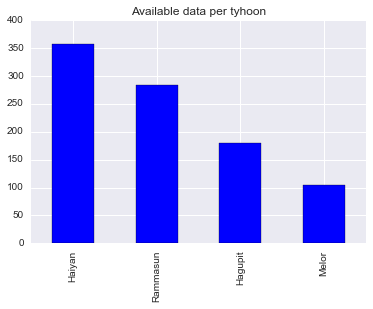

In [81]:
T.typhoon_name.value_counts().plot(kind='bar', figsize=(6,4), title = 'Available data per tyhoon')


#### Data completness

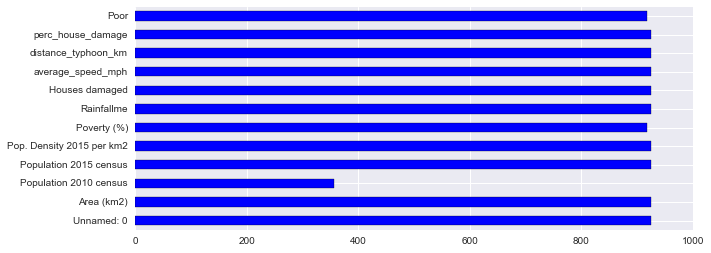

In [82]:
T[pd.notnull(T['Houses damaged'])].describe().transpose()['count'].plot(kind='barh', figsize=(10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11011c390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117edd090>]], dtype=object)

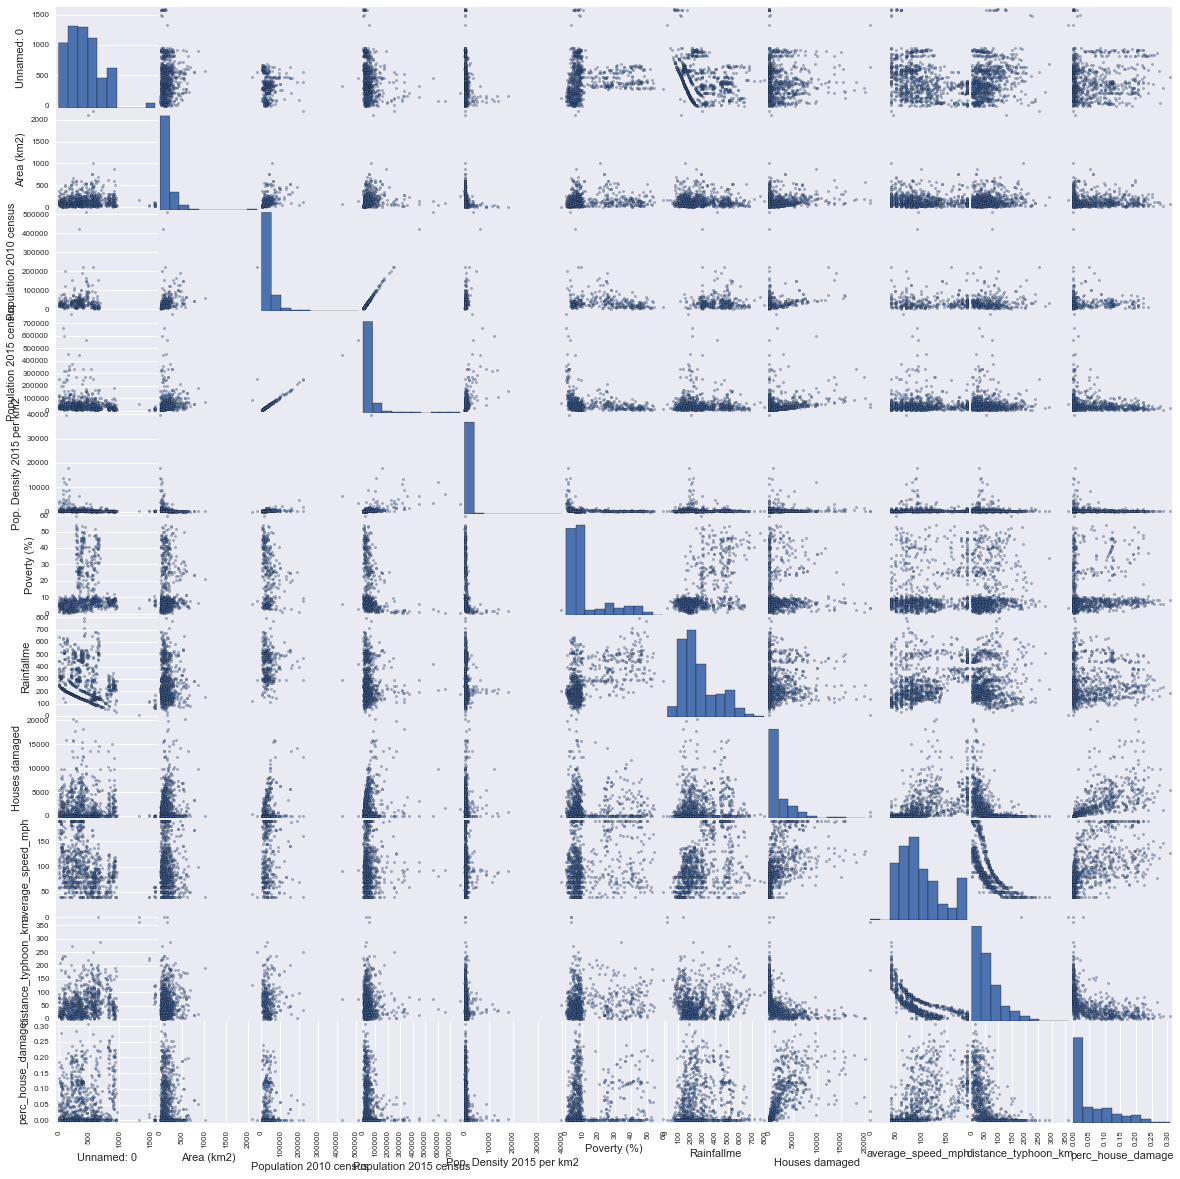

In [66]:
scatter_matrix(T, figsize=(20,20))

#### Distribution of houses damaged per typhoon

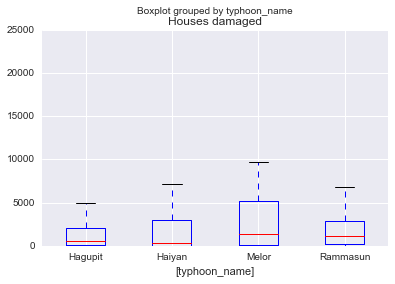

In [67]:

T[['Houses damaged',   'typhoon_name']].boxplot(by='typhoon_name')

#### Distribution of windspeed

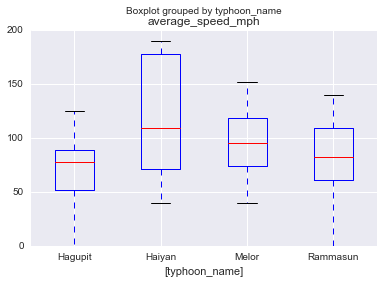

In [68]:
T[['average_speed_mph', 'typhoon_name']].boxplot(by='typhoon_name')

### Houses damaged per municipality depending on typhoon

#### Displaying spread of damage per region

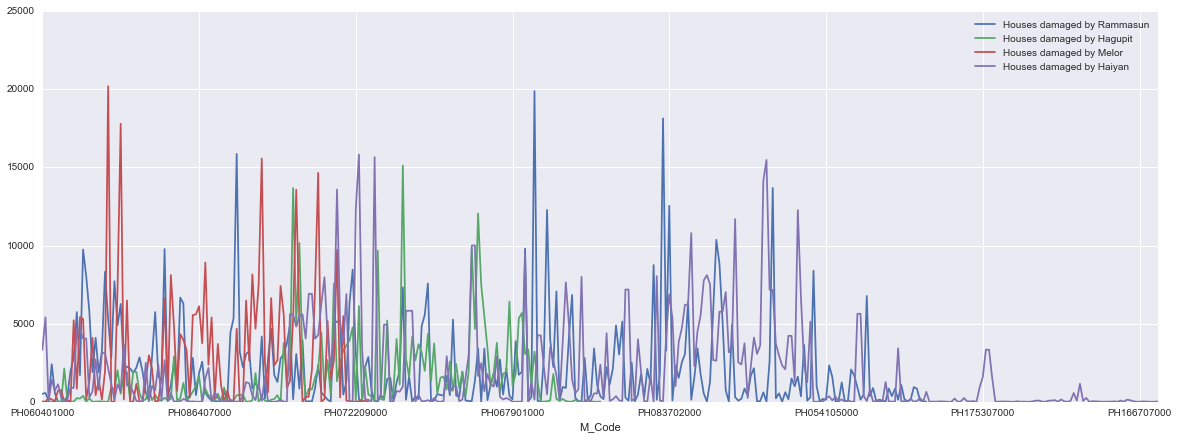

In [69]:
for t in T['typhoon_name'].unique():
    hd = T.loc[T['typhoon_name'] == t]['Houses damaged']
    ax = hd.plot(figsize=(20,7), label='Houses damaged by ' + t)
    
ax.legend()


#### Typhoons windspeed comparison

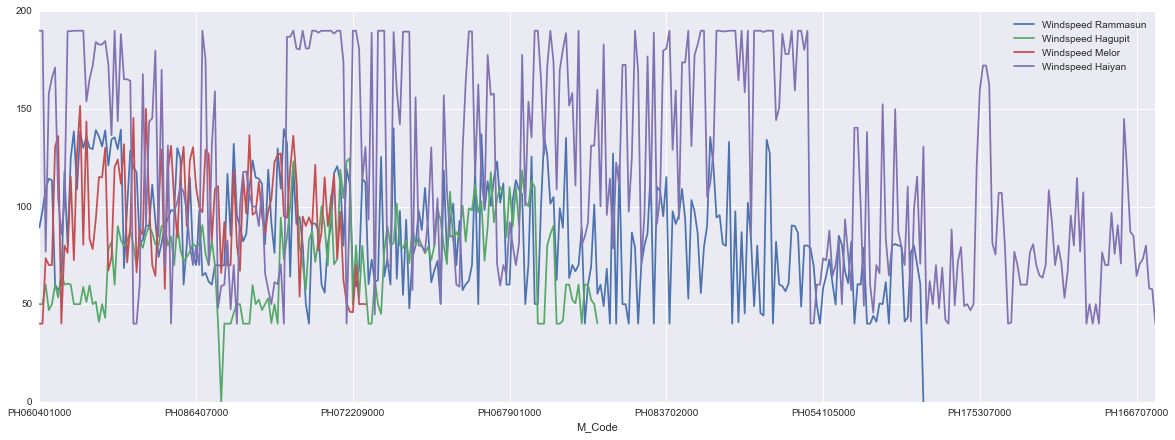

In [70]:
for t in T['typhoon_name'].unique():
    w = T.loc[T['typhoon_name'] == t]['average_speed_mph']
    ax = w.plot(figsize=(20,7), label='Windspeed ' + t)

ax.legend()

### Damages caused by each typhoon depending on windspeed

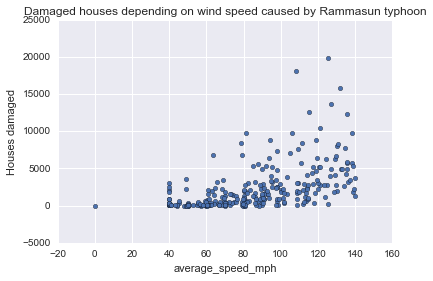

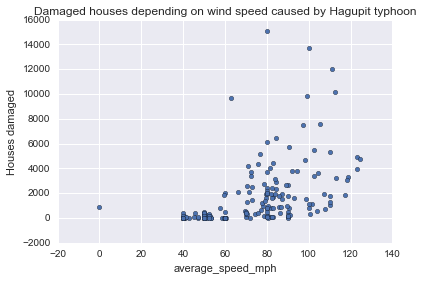

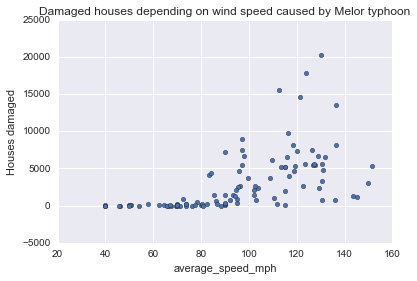

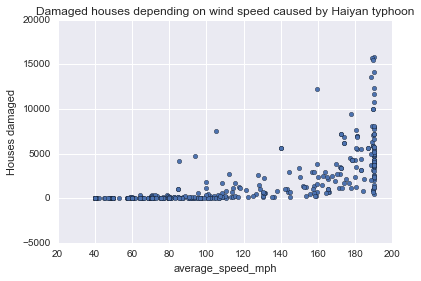

In [71]:
for t in T['typhoon_name'].unique():
    T.loc[T['typhoon_name'] == t].plot(kind='scatter', x='average_speed_mph', y = 'Houses damaged', title='Damaged houses depending on wind speed caused by ' + t + ' typhoon')


### Correlations betweem damaged houses and other parameters

#### All typhoons

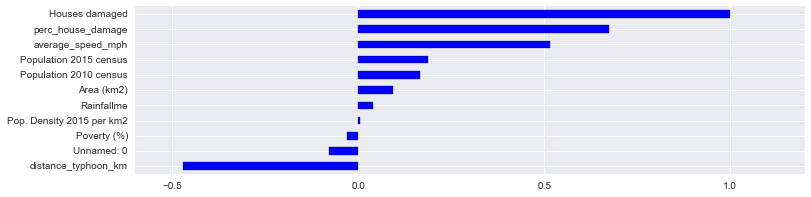

In [72]:
T.corr()['Houses damaged'].sort_values().plot(kind='barh',  figsize=(12, 3))

#### per typhoon

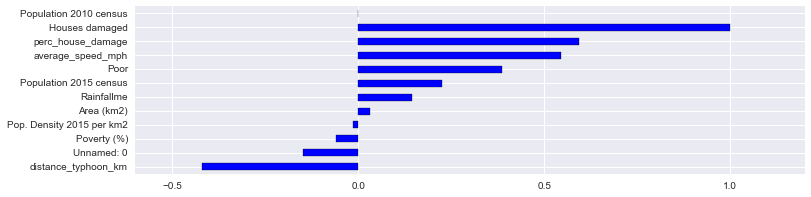

In [83]:
T.loc[T['typhoon_name'] == 'Rammasun'].corr()['Houses damaged'].sort_values().plot(kind='barh',  figsize=(12, 3))

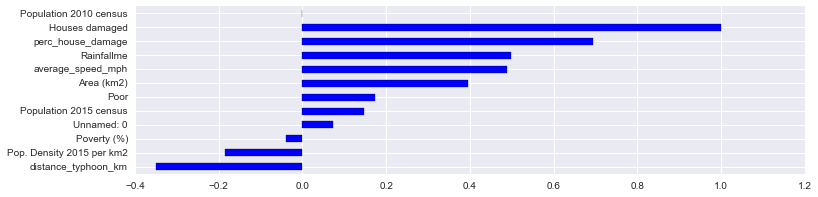

In [84]:
T.loc[T['typhoon_name'] == 'Hagupit'].corr()['Houses damaged'].sort_values().plot(kind='barh',  figsize=(12, 3))

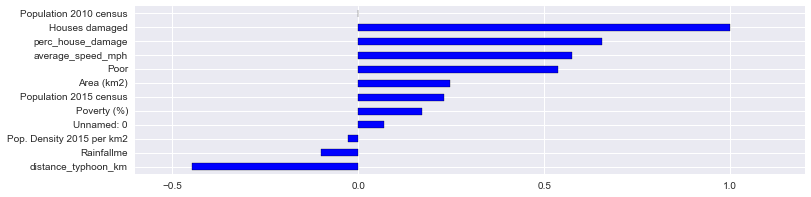

In [85]:
T.loc[T['typhoon_name'] == 'Melor'].corr()['Houses damaged'].sort_values().plot(kind='barh',  figsize=(12, 3))

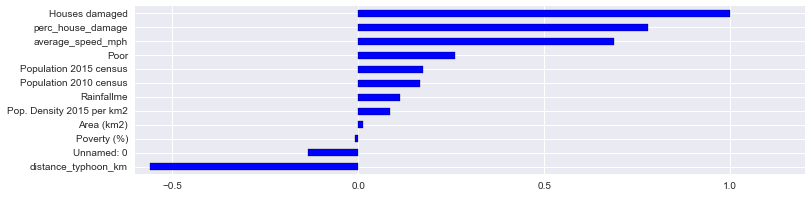

In [86]:
T.loc[T['typhoon_name'] == 'Haiyan'].corr()['Houses damaged'].sort_values().plot(kind='barh',  figsize=(12, 3))